# Flight Price Prediction 
**OBJECTIVE:**
* Predict flight ticket prices based on date, destination, and other factors. 

**DATA COLLECTION:**
* Data is collected from Kaggle: Flight Price Prediction uploaded by Shubham Bathwal.

In [1]:
#imported necessary library function and datasets for this project 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv('Clean_Dataset.csv')

In [2]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [3]:
#to ignore the warnings

import warnings
warnings.filterwarnings('ignore')

# DATA CLEANING

**missing values, correct datatypes, standardization**

In [4]:
df.info()
df.head()

#no missing values found and datatypes are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**duplicates**

In [5]:
df.duplicated().sum()
#no duplicate values

np.int64(0)

In [6]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

**renaming columns**

In [7]:
df.rename(columns={'Unnamed: 0':'Index'},inplace=True)

**dropping irrelevant columns** 
- droping as these column doesnot help in price prediction

In [10]:
df.source_city.nunique()


6

In [11]:
df.destination_city.nunique()

6

In [873]:
df=df.drop(columns=['source_city','destination_city','flight'])
df.head()

,Index,airline,departure_time,stops,arrival_time,class,duration,days_left,price
0,0,SpiceJet,Evening,zero,Night,Economy,2.17,1,5953
1,1,SpiceJet,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,2,AirAsia,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,3,Vistara,Morning,zero,Afternoon,Economy,2.25,1,5955
4,4,Vistara,Morning,zero,Morning,Economy,2.33,1,5955


**encoding part**
- for easier process we convert categorical values into true and false(boolean)
- then boolean values into 0 and 1

In [874]:
categorical_variables = ['airline', 'departure_time', 'arrival_time', 'class']

df_clean_encoded = pd.get_dummies(df, columns=categorical_variables, drop_first=False)

print(df_clean_encoded.dtypes)


Index                             int64
stops                            object
duration                        float64
days_left                         int64
price                             int64
airline_AirAsia                    bool
airline_Air_India                  bool
airline_GO_FIRST                   bool
airline_Indigo                     bool
airline_SpiceJet                   bool
airline_Vistara                    bool
departure_time_Afternoon           bool
departure_time_Early_Morning       bool
departure_time_Evening             bool
departure_time_Late_Night          bool
departure_time_Morning             bool
departure_time_Night               bool
arrival_time_Afternoon             bool
arrival_time_Early_Morning         bool
arrival_time_Evening               bool
arrival_time_Late_Night            bool
arrival_time_Morning               bool
arrival_time_Night                 bool
class_Business                     bool
class_Economy                      bool


In [875]:
boolean_columns = df_clean_encoded.select_dtypes(include='bool').columns
df_clean_encoded[boolean_columns] = df_clean_encoded[boolean_columns].astype(int)
print(df_clean_encoded.head())


   Index stops  duration  days_left  price  airline_AirAsia  \
0      0  zero      2.17          1   5953                0   
1      1  zero      2.33          1   5953                0   
2      2  zero      2.17          1   5956                1   
3      3  zero      2.25          1   5955                0   
4      4  zero      2.33          1   5955                0   

   airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  ...  \
0                  0                 0               0                 1  ...   
1                  0                 0               0                 1  ...   
2                  0                 0               0                 0  ...   
3                  0                 0               0                 0  ...   
4                  0                 0               0                 0  ...   

   departure_time_Morning  departure_time_Night  arrival_time_Afternoon  \
0                       0                     0            

In [876]:
df_clean_encoded['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [877]:
df_clean_encoded['stops'] = df_clean_encoded['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
#replacing stops string input into equivalent numeric values

In [878]:
df_clean_encoded['stops'].unique()

array([0, 1, 2])

In [879]:
df_clean_encoded.head()

,Index,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,1,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,2,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,0,2.25,1,5955,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,4,0,2.33,1,5955,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [880]:
df_clean_encoded.dtypes

Index                             int64
stops                             int64
duration                        float64
days_left                         int64
price                             int64
airline_AirAsia                   int64
airline_Air_India                 int64
airline_GO_FIRST                  int64
airline_Indigo                    int64
airline_SpiceJet                  int64
airline_Vistara                   int64
departure_time_Afternoon          int64
departure_time_Early_Morning      int64
departure_time_Evening            int64
departure_time_Late_Night         int64
departure_time_Morning            int64
departure_time_Night              int64
arrival_time_Afternoon            int64
arrival_time_Early_Morning        int64
arrival_time_Evening              int64
arrival_time_Late_Night           int64
arrival_time_Morning              int64
arrival_time_Night                int64
class_Business                    int64
class_Economy                     int64


In [881]:
#finding unique values in columns
for category in categorical_variables:
    print(f"Number of unique values in {category} = {len(df[category].unique())}")

Number of unique values in airline = 6
Number of unique values in departure_time = 6
Number of unique values in arrival_time = 6
Number of unique values in class = 2


In [882]:
#encoded values into new csv file named "cleaned.csv"
df_clean_encoded.to_csv("cleaned.csv", index=False)

In [883]:
# now cleaned.csv acts as a dataframe
df=pd.read_csv('cleaned.csv')
df.head()

,Index,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,1,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,2,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,0,2.25,1,5955,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,4,0,2.33,1,5955,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


# EDA

In [884]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [885]:
df.columns

Index(['Index', 'stops', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'class_Business', 'class_Economy'],
      dtype='object')

**correlation analysis(for redundancy)**
- Check for highly correlated features (above 0.9) and remove one of the column

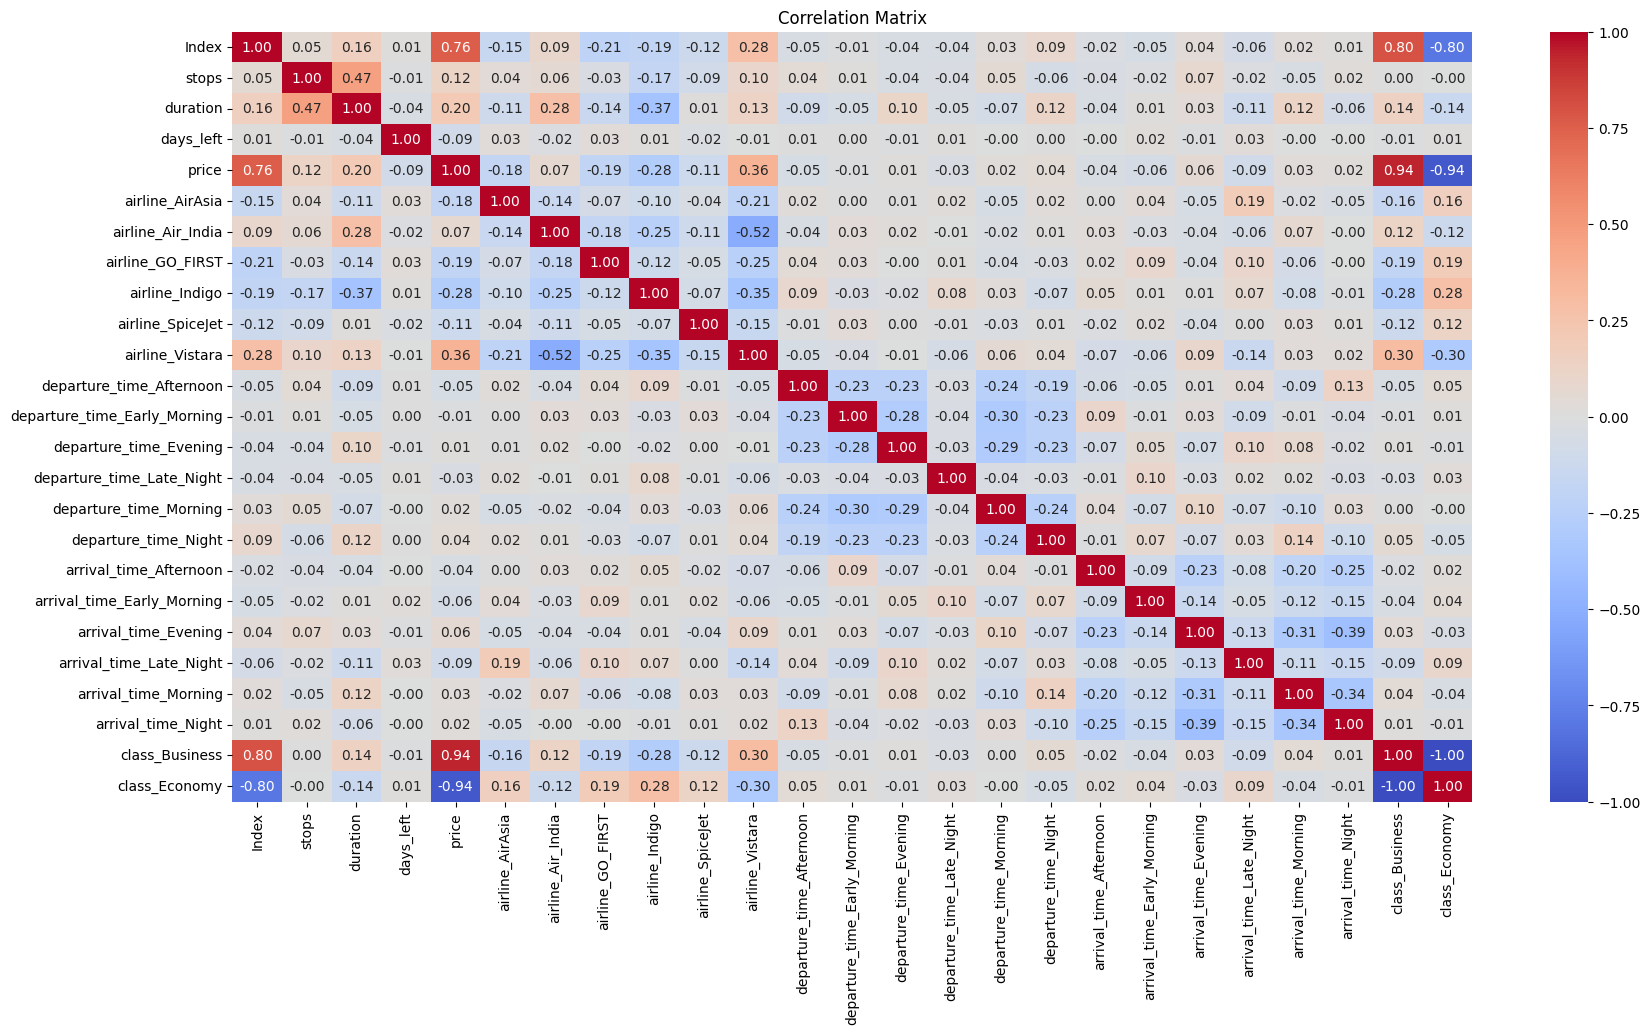

In [886]:
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

class_business and price have high correlation, does that mean we should remove one of the columns? we have used class_business for further use too..

**Variance Threshold (For Low-Impact Features)**
- Features with low variance contribute little to predictions.
- Drop low-variance features.

In [887]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Remove features with variance < 1%
selector.fit(df)

# Get the names of the features that have low variance and will be removed
low_variance_features = df.columns[~selector.get_support()]

# Display the features with low variance
print("Features with low variance:")
print(low_variance_features)



Features with low variance:
Index(['departure_time_Late_Night'], dtype='object')


but this feature is later used to make a column ie red_eye_flight in feature engineering, so isnt removed

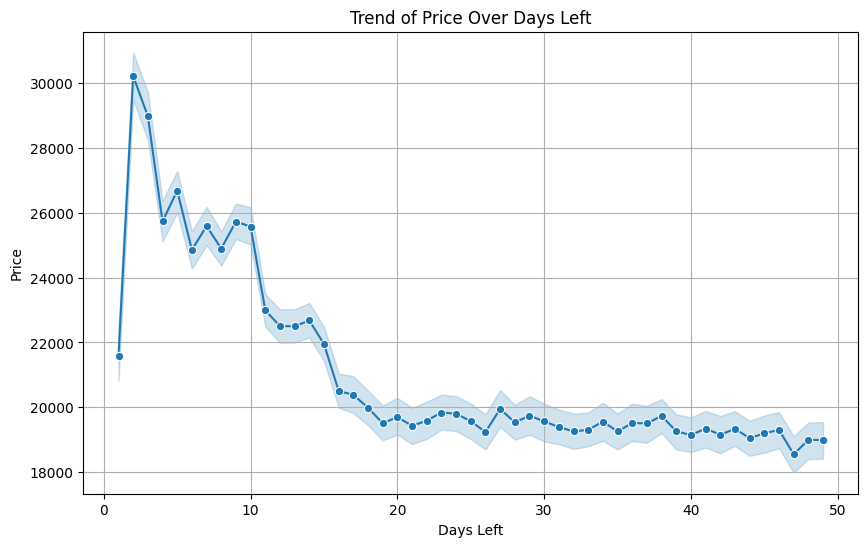

In [888]:
#price vs days_left

plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=df, marker='o')
plt.title('Trend of Price Over Days Left')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [889]:
import pandas as pd

# Step 1: Filter rows where airline_spicejet == 1
spicejet_data = df[df['airline_SpiceJet'] == 1]

# Step 2: Filter for Economy class
economy_prices = spicejet_data[spicejet_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = spicejet_data[spicejet_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 5654.0
Median price for Business class: nan


the median price of business class is Nan beacause the airline doesnot provide business class facility

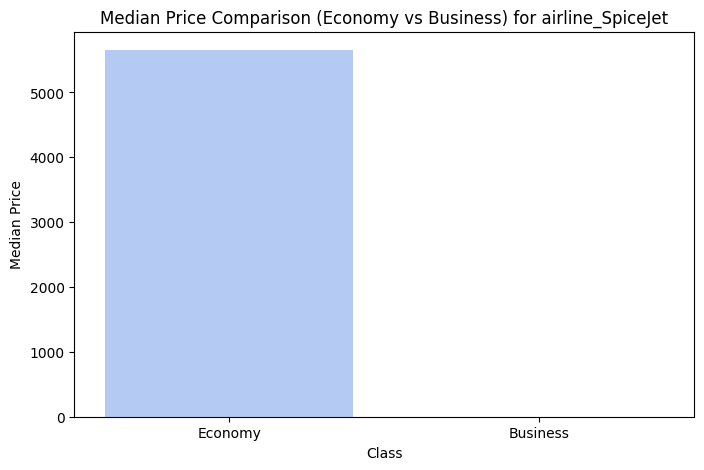

In [890]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_SpiceJet')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [891]:
import pandas as pd

AirAsia_data = df[df['airline_AirAsia'] == 1]

economy_prices = AirAsia_data[AirAsia_data['class_Economy'] == 1]['price']

business_prices = AirAsia_data[AirAsia_data['class_Business'] == 1]['price']

median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 3276.0
Median price for Business class: nan


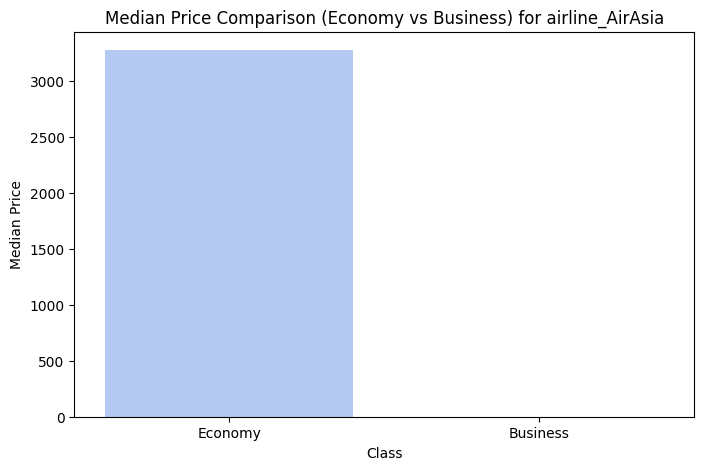

In [892]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_AirAsia')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [893]:
import pandas as pd

# Step 1: Filter rows where airline_Air_India == 1
AirIndia_data = df[df['airline_Air_India'] == 1]

# Step 2: Filter for Economy class
economy_prices = AirIndia_data[AirIndia_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = AirIndia_data[AirIndia_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 6082.0
Median price for Business class: 49613.0


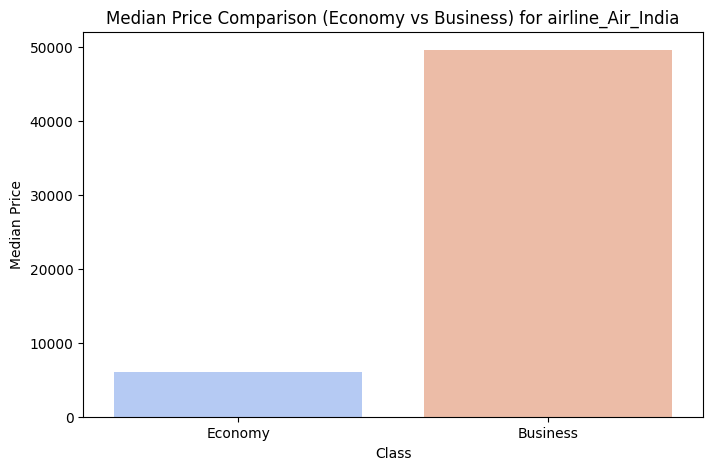

In [894]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_Air_India')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [895]:

import pandas as pd

# Step 1: Filter rows where airline_AGO_FIRST == 1
GO_FIRST_data = df[df['airline_GO_FIRST'] == 1]

# Step 2: Filter for Economy class
economy_prices = GO_FIRST_data[GO_FIRST_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = GO_FIRST_data[GO_FIRST_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 5336.0
Median price for Business class: nan


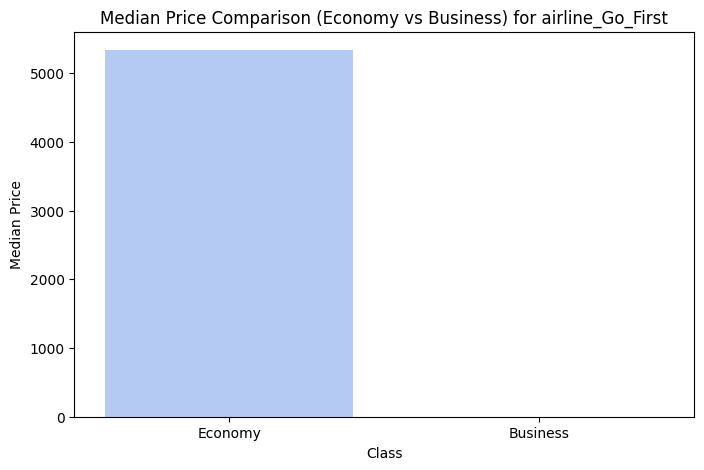

In [896]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_Go_First')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [897]:
import pandas as pd

# Step 1: Filter rows where airline_Indigo == 1
Indigo_data = df[df['airline_Indigo'] == 1]

# Step 2: Filter for Economy class
economy_prices = Indigo_data[Indigo_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = Indigo_data[Indigo_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 4453.0
Median price for Business class: nan


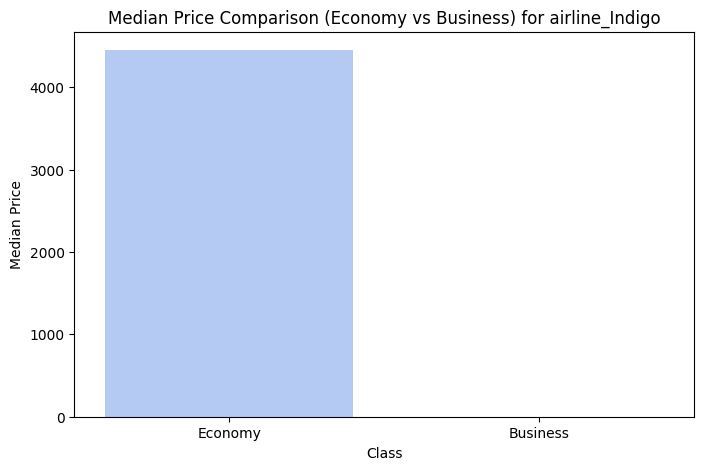

In [898]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_Indigo')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [899]:
import pandas as pd

# Step 1: Filter rows where airline_Vistara == 1
Vistara_data = df[df['airline_Vistara'] == 1]

# Step 2: Filter for Economy class
economy_prices = Vistara_data[Vistara_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = Vistara_data[Vistara_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 6461.0
Median price for Business class: 56588.0


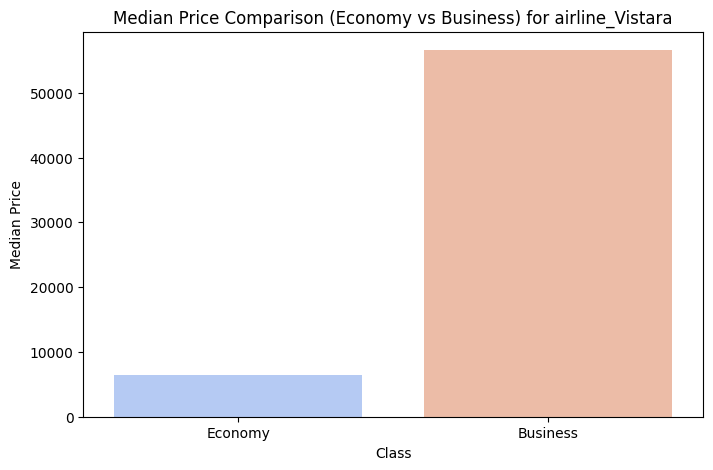

In [900]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_Vistara')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

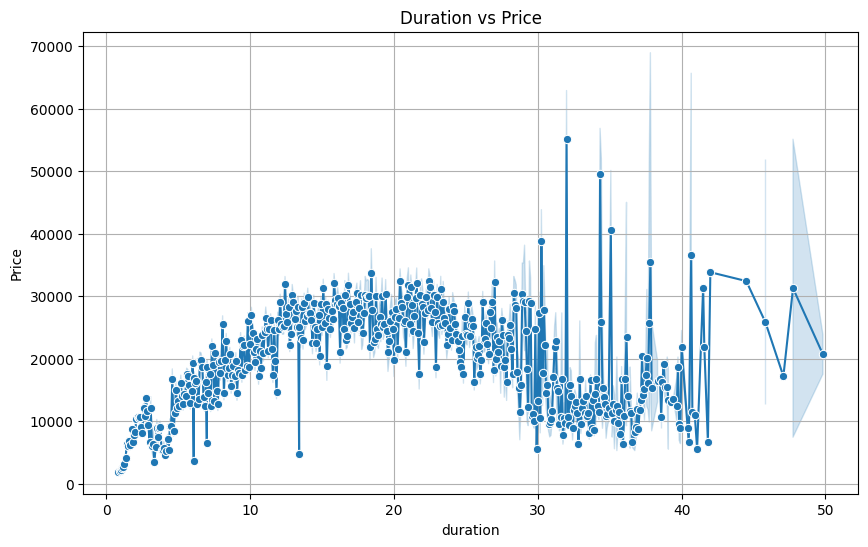

In [901]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='duration', y='price', data=df, marker='o')
plt.title('Duration vs Price')
plt.xlabel('duration')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# EDA Task

**1.target variable analysis**

**price binning**
- categorizing price into bins(low,mid,high) to analyze the pattern

In [902]:
df.describe().price

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [903]:
price_bins = [1105, 4783,42521,123071 ]  
price_labels = ['low', 'middle', 'high']
df['price Group'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

print("Dataset after Binning Age:")
print(df[['price', 'price Group']])

Dataset after Binning Age:
        price price Group
0        5953      middle
1        5953      middle
2        5956      middle
3        5955      middle
4        5955      middle
...       ...         ...
300148  69265        high
300149  77105        high
300150  79099        high
300151  81585        high
300152  81585        high

[300153 rows x 2 columns]


In [904]:
df['price Group'] = df['price Group'].replace({'low': 0, 'middle': 1, 'high': 2})

In [905]:
df['price Group'] = df['price Group'].astype('category').cat.codes.astype('int64')

In [906]:
df.dtypes

Index                             int64
stops                             int64
duration                        float64
days_left                         int64
price                             int64
airline_AirAsia                   int64
airline_Air_India                 int64
airline_GO_FIRST                  int64
airline_Indigo                    int64
airline_SpiceJet                  int64
airline_Vistara                   int64
departure_time_Afternoon          int64
departure_time_Early_Morning      int64
departure_time_Evening            int64
departure_time_Late_Night         int64
departure_time_Morning            int64
departure_time_Night              int64
arrival_time_Afternoon            int64
arrival_time_Early_Morning        int64
arrival_time_Evening              int64
arrival_time_Late_Night           int64
arrival_time_Morning              int64
arrival_time_Night                int64
class_Business                    int64
class_Economy                     int64


**extreme values**
- To identify unusally expensive flights or cheap flights

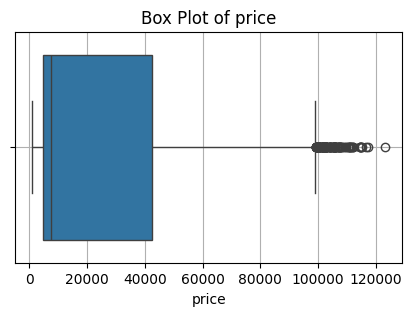

In [907]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.title('Box Plot of price')
plt.xlabel('price')
plt.grid()
plt.show()

#unusually expensive flights is seen

unusually expensive flights are seen

- do we have to remove these outliers? as these values arenot due to errors they may be due to luxury flight, last-minute flights and if we have to see duration columns, there are many outliers but do they affect the price prediction process?


**2.categorical feature analysis**

**airplane vs price**

In [908]:
df.columns

Index(['Index', 'stops', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'class_Business', 'class_Economy', 'price Group'],
      dtype='object')

In [909]:
df.head()

,Index,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,price Group
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
1,1,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
2,2,0,2.17,1,5956,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,3,0,2.25,1,5955,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,4,0,2.33,1,5955,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


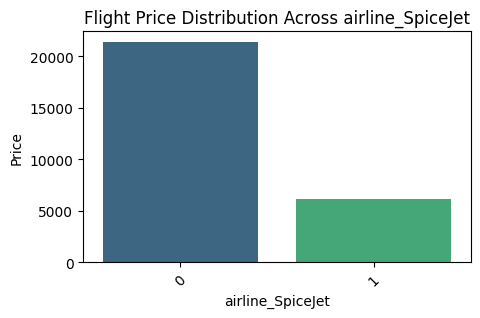

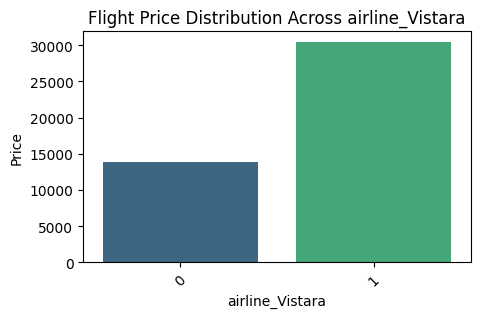

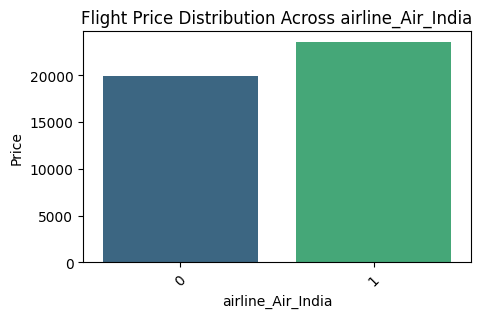

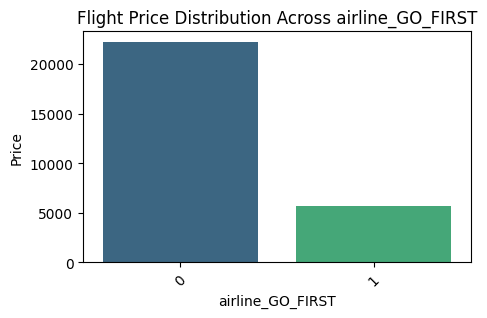

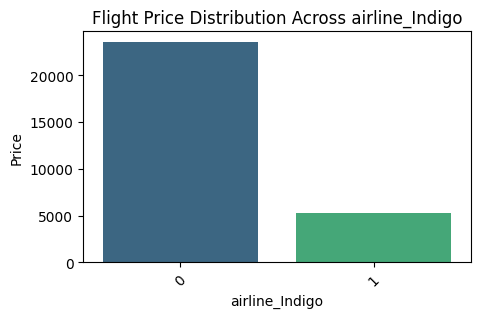

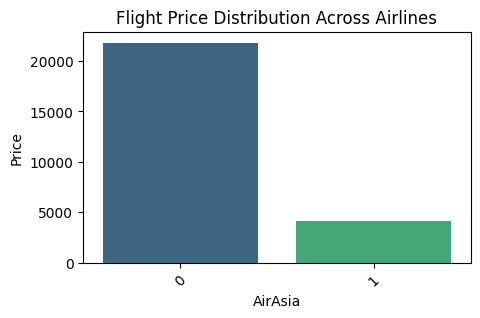

In [910]:
#compared price variations across different airlines

plt.figure(figsize=(5, 3))
sns.barplot(x='airline_SpiceJet', y='price', data=df, palette='viridis', ci=None)
plt.title("Flight Price Distribution Across airline_SpiceJet")
plt.xlabel("airline_SpiceJet")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(x='airline_Vistara', y='price', data=df, palette='viridis', ci=None)
plt.title("Flight Price Distribution Across airline_Vistara")
plt.xlabel("airline_Vistara")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(x='airline_Air_India', y='price', data=df, palette='viridis', ci=None)
plt.title("Flight Price Distribution Across airline_Air_India")
plt.xlabel("airline_Air_India")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(x='airline_GO_FIRST', y='price', data=df, palette='viridis', ci=None)
plt.title("Flight Price Distribution Across airline_GO_FIRST")
plt.xlabel("airline_GO_FIRST")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(x='airline_Indigo', y='price', data=df, palette='viridis', ci=None)
plt.title("Flight Price Distribution Across airline_Indigo")
plt.xlabel("airline_Indigo")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(x='airline_AirAsia', y='price', data=df, palette='viridis', ci=None)
plt.title("Flight Price Distribution Across Airlines")
plt.xlabel("AirAsia")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

premium airline vs budget airline

In [911]:
df.columns

Index(['Index', 'stops', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'class_Business', 'class_Economy', 'price Group'],
      dtype='object')

In [912]:
airline_columns = [ 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara']
df['airline'] = df[airline_columns].idxmax(axis=1)  
df['airline'] = df['airline'].str.replace('airline_', '')  

median_price = df['price'].median()

avg_prices = df.groupby('airline')['price'].median()

airline_category = avg_prices.apply(lambda x: 'Premium' if x > median_price else 'Budget')

print("Median Ticket Price:", median_price)
print("\nAverage Ticket Price per Airline:\n", avg_prices)
print("\nAirline Classification:\n", airline_category)

Median Ticket Price: 7425.0

Average Ticket Price per Airline:
 airline
AirAsia       3276.0
Air_India    11520.0
GO_FIRST      5336.0
Indigo        4453.0
SpiceJet      5654.0
Vistara      15543.0
Name: price, dtype: float64

Airline Classification:
 airline
AirAsia       Budget
Air_India    Premium
GO_FIRST      Budget
Indigo        Budget
SpiceJet      Budget
Vistara      Premium
Name: price, dtype: object


In [913]:
df = df.drop('airline', axis=1)


In [914]:
df.dtypes

Index                             int64
stops                             int64
duration                        float64
days_left                         int64
price                             int64
airline_AirAsia                   int64
airline_Air_India                 int64
airline_GO_FIRST                  int64
airline_Indigo                    int64
airline_SpiceJet                  int64
airline_Vistara                   int64
departure_time_Afternoon          int64
departure_time_Early_Morning      int64
departure_time_Evening            int64
departure_time_Late_Night         int64
departure_time_Morning            int64
departure_time_Night              int64
arrival_time_Afternoon            int64
arrival_time_Early_Morning        int64
arrival_time_Evening              int64
arrival_time_Late_Night           int64
arrival_time_Morning              int64
arrival_time_Night                int64
class_Business                    int64
class_Economy                     int64


In [915]:
df

,Index,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,price Group
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
1,1,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
2,2,0,2.17,1,5956,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,3,0,2.25,1,5955,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,4,0,2.33,1,5955,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,1,10.08,49,69265,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
300149,300149,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,2
300150,300150,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,2
300151,300151,1,10.00,49,81585,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2


**class vs price**

   class_Business    price
0               0   5772.0
1               1  53164.0


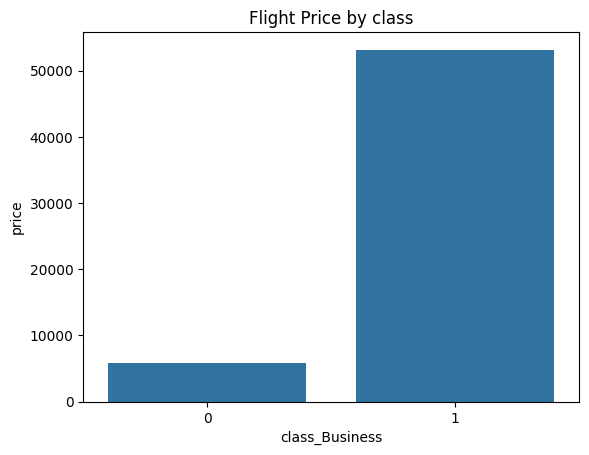

In [916]:
stops_price = df.groupby('class_Business')['price'].median().reset_index()
print(stops_price)

sns.barplot(x='class_Business', y='price', data=stops_price)
plt.title('Flight Price by class')
plt.show()


business class price is much greater than economy class

- source and destination cities impact: no different source and destination so this step skipped

**number of stops vs price**

   stops   price
0      0  4499.0
1      1  7959.0
2      2  8307.0


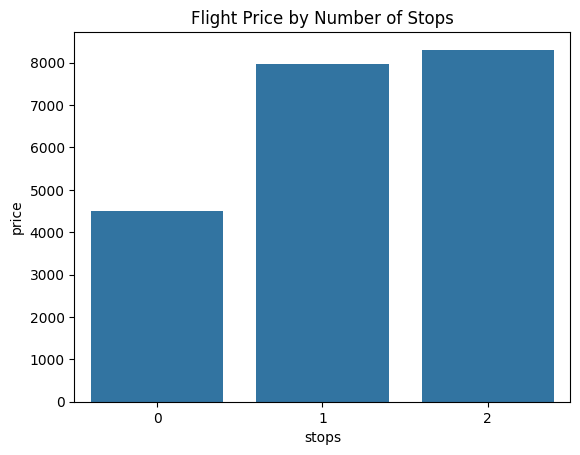

In [917]:
stops_price = df.groupby('stops')['price'].median().reset_index()
print(stops_price)

sns.barplot(x='stops', y='price', data=stops_price)
plt.title('Flight Price by Number of Stops')
plt.show()


- usually layover flights are cheap but in this case layover flights are expensive

**3.time-based analysis**


**days left vs price trend**
- To identify how price fluctuate as departure date approaches

In [918]:
df.describe().days_left

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

In [919]:
df.columns

Index(['Index', 'stops', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'class_Business', 'class_Economy', 'price Group'],
      dtype='object')

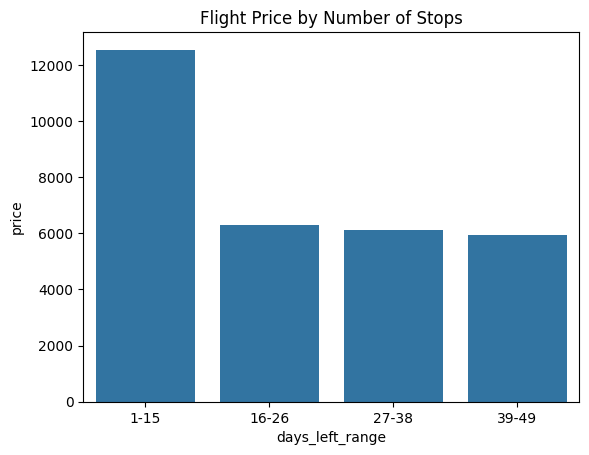

In [920]:
bins = [1, 15, 26, 38, 49]
labels = ['1-15', '16-26', '27-38', '39-49']
df['days_left_range'] = pd.cut(df['days_left'], bins=bins, labels=labels)

stops_price = df.groupby('days_left_range')['price'].median().reset_index()

sns.barplot(x='days_left_range', y='price', data=stops_price)
plt.title('Flight Price by Number of Stops')
plt.show()


- if you book your earlier than your flight time you will get cheap price tickets

**departure and arrival time impact**

In [921]:
df.columns

Index(['Index', 'stops', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'class_Business', 'class_Economy', 'price Group', 'days_left_range'],
      dtype='object')

In [922]:
time_columns = [ 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night']
price_comparison = {}

for col in time_columns:
    median_price = df.groupby(col)['price'].median().reset_index()
    price_comparison[col] = median_price

# Display the results
for col, data in price_comparison.items():
    print(f"\nPrice for {col}:\n", data)



Price for departure_time_Afternoon:
    departure_time_Afternoon   price
0                         0  7496.0
1                         1  6663.0

Price for departure_time_Early_Morning:
    departure_time_Early_Morning   price
0                             0  7487.0
1                             1  7212.0

Price for departure_time_Evening:
    departure_time_Evening   price
0                       0  7426.0
1                       1  7425.0

Price for departure_time_Late_Night:
    departure_time_Late_Night   price
0                          0  7434.0
1                          1  4499.0

Price for departure_time_Morning:
    departure_time_Morning   price
0                       0  7240.0
1                       1  8112.0

Price for departure_time_Night:
    departure_time_Night   price
0                     0  7424.0
1                     1  7813.0


- morning time price are more expensive
- late_night ticket price are cheaper

- peak vs off-peak travel time: no such info is given to perform these steps
- weekdays vs weekend pricing trends: not mention weekdays and weekend so skiped

**4.feature interactions and dervied insights**


In [923]:
df.columns

Index(['Index', 'stops', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'class_Business', 'class_Economy', 'price Group', 'days_left_range'],
      dtype='object')

**airline vs class interaction**
- to analyze which airline charge more for business class

In [924]:
df_business = df[df['class_Business'] == 1]
business_prices = df_business.groupby('airline_Indigo')['price'].median()
print(business_prices)
business_prices1 = df_business.groupby('airline_AirAsia')['price'].median()
print(business_prices1)
business_prices2 = df_business.groupby('airline_Air_India')['price'].median()
print(business_prices2)
business_prices3 = df_business.groupby('airline_GO_FIRST')['price'].median()
print(business_prices3)
business_prices4 = df_business.groupby('airline_SpiceJet')['price'].median()
print(business_prices4)
business_prices5 = df_business.groupby('airline_Vistara')['price'].median()
print(business_prices5)
max_price_indigo = business_prices.max()
max_price_airasia = business_prices1.max()
max_price_airindia = business_prices2.max()
max_price_go_first = business_prices3.max()
max_price_spicejet = business_prices4.max()
max_price_vistara = business_prices5.max()

greatest_price = max(max_price_indigo, max_price_airasia, max_price_airindia, max_price_go_first, max_price_spicejet, max_price_vistara)

if greatest_price == max_price_indigo:
    greatest_airline = 'Indigo'
elif greatest_price == max_price_airasia:
    greatest_airline = 'AirAsia'
elif greatest_price == max_price_airindia:
    greatest_airline = 'Air India'
elif greatest_price == max_price_go_first:
    greatest_airline = 'GO FIRST'
elif greatest_price == max_price_spicejet:
    greatest_airline = 'SpiceJet'
else:
    greatest_airline = 'Vistara'

# Print the result
print(f"The greatest business class price is {greatest_price} from {greatest_airline} airline.")

airline_Indigo
0    53164.0
Name: price, dtype: float64
airline_AirAsia
0    53164.0
Name: price, dtype: float64
airline_Air_India
0    56588.0
1    49613.0
Name: price, dtype: float64
airline_GO_FIRST
0    53164.0
Name: price, dtype: float64
airline_SpiceJet
0    53164.0
Name: price, dtype: float64
airline_Vistara
0    49613.0
1    56588.0
Name: price, dtype: float64
The greatest business class price is 56588.0 from Air India airline.


from above we can see airline_vistara charge more for business class

**stops vs duration vs price**
- as per our data long duration increases the ticket price(actually it should be decreased)

**feature engineering**
- Flight Age (days left before departure). (exist)
- Price per Kilometer (if distance data available). (distance data not available)
- Red-Eye Flight Indicator (late-night departures). ( late-night flight that departs late in the evening or at night and arrives the following morning)
- Peak Season Flag (based on month).(not given)

In [925]:
df.columns

Index(['Index', 'stops', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'class_Business', 'class_Economy', 'price Group', 'days_left_range'],
      dtype='object')

In [926]:
df['red_eye_flight'] = df.apply(lambda row: 1 if (
    row['departure_time_Late_Night'] == 1 and (row['arrival_time_Early_Morning'] == 1 or row['arrival_time_Morning'] == 1)
) else 0, axis=1)
df.columns

Index(['Index', 'stops', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'class_Business', 'class_Economy', 'price Group', 'days_left_range',
       'red_eye_flight'],
      dtype='object')

added a column which shows red_eye_flights in our dataset

In [927]:
df=df.drop(columns=['days_left_range'],axis=1)
df

,Index,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,price Group,red_eye_flight
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,1,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
2,2,0,2.17,1,5956,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,3,0,2.25,1,5955,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,4,0,2.33,1,5955,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,1,10.08,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,2,0
300149,300149,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,1,1,0,2,0
300150,300150,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,1,1,0,2,0
300151,300151,1,10.00,49,81585,0,0,0,0,0,...,0,0,1,0,0,0,1,0,2,0


**skewness before scaling**

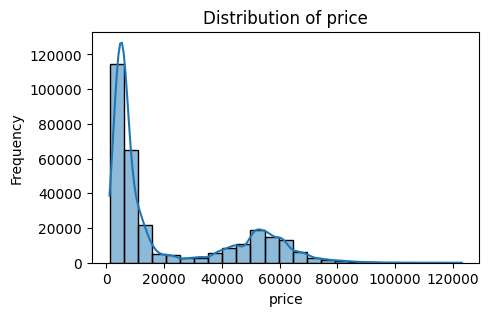

In [928]:
plt.figure(figsize=(5, 3)) # Figsize(width, height)
sns.histplot(data=df["price"], bins=25, kde=True) 
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

In [929]:
print("Skewness value of duration: ", df["duration"].skew())
print("Skewness value of price: ", df["price"].skew())
print("Skewness value of stops: ", df["stops"].skew())
print("Skewness value of days_left: ", df["days_left"].skew())


Skewness value of duration:  0.6028991297746269
Skewness value of price:  1.0613772532064343
Skewness value of stops:  -0.6223632829321687
Skewness value of days_left:  -0.03546434955066582


- skewness value indicates the asymmetry of a probability distribution
- example: Positively Skewed (Right-Skewed): The right tail is longer, meaning most data points are concentrated on the left, but a few extreme values pull the mean to the right. Example: Income distribution (a few people earn extremely high salaries).

**scaling**

In [930]:
from sklearn.preprocessing import StandardScaler
# standardscaler and z-score normalization is same, here range isnt always 0-1

columns_to_scale = ['duration', 'price', 'stops', 'days_left','price Group']

scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\nScaled DataFrame:")
print(df)


Scaled DataFrame:
         Index     stops  duration  days_left     price  airline_AirAsia  \
0            0 -2.321779 -1.397531  -1.843875 -0.658068                0   
1            1 -2.321779 -1.375284  -1.843875 -0.658068                0   
2            2 -2.321779 -1.397531  -1.843875 -0.657936                1   
3            3 -2.321779 -1.386407  -1.843875 -0.657980                0   
4            4 -2.321779 -1.375284  -1.843875 -0.657980                0   
...        ...       ...       ...        ...       ...              ...   
300148  300148  0.190121 -0.297695   1.695692  2.131285                0   
300149  300149  0.190121 -0.250421   1.695692  2.476694                0   
300150  300150  0.190121  0.223718   1.695692  2.564545                0   
300151  300151  0.190121 -0.308819   1.695692  2.674071                0   
300152  300152  0.190121 -0.297695   1.695692  2.674071                0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline

**skewness after scaling**

In [931]:
print("Skewness value of duration: ", df["duration"].skew())
print("Skewness value of price: ", df["price"].skew())
print("Skewness value of stops: ", df["stops"].skew())
print("Skewness value of days_left: ", df["days_left"].skew())


Skewness value of duration:  0.6028991297746268
Skewness value of price:  1.0613772532064343
Skewness value of stops:  -0.6223632829321688
Skewness value of days_left:  -0.03546434955066649


In [932]:
df.to_csv("cleaned2.csv", index=False)

In [933]:
df=pd.read_csv('cleaned2.csv')
df.head()

,Index,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,price Group,red_eye_flight
0,0,-2.321779,-1.397531,-1.843875,-0.658068,0,0,0,0,1,...,0,0,0,0,0,1,0,1,-0.001593,0
1,1,-2.321779,-1.375284,-1.843875,-0.658068,0,0,0,0,1,...,0,0,0,0,1,0,0,1,-0.001593,0
2,2,-2.321779,-1.397531,-1.843875,-0.657936,1,0,0,0,0,...,0,1,0,0,0,0,0,1,-0.001593,0
3,3,-2.321779,-1.386407,-1.843875,-0.657980,0,0,0,0,0,...,1,0,0,0,0,0,0,1,-0.001593,0
4,4,-2.321779,-1.375284,-1.843875,-0.657980,0,0,0,0,0,...,0,0,0,0,1,0,0,1,-0.001593,0


# Model Training


In [934]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [935]:
df = pd.read_csv("cleaned2.csv")
df.head()

,Index,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,price Group,red_eye_flight
0,0,-2.321779,-1.397531,-1.843875,-0.658068,0,0,0,0,1,...,0,0,0,0,0,1,0,1,-0.001593,0
1,1,-2.321779,-1.375284,-1.843875,-0.658068,0,0,0,0,1,...,0,0,0,0,1,0,0,1,-0.001593,0
2,2,-2.321779,-1.397531,-1.843875,-0.657936,1,0,0,0,0,...,0,1,0,0,0,0,0,1,-0.001593,0
3,3,-2.321779,-1.386407,-1.843875,-0.657980,0,0,0,0,0,...,1,0,0,0,0,0,0,1,-0.001593,0
4,4,-2.321779,-1.375284,-1.843875,-0.657980,0,0,0,0,0,...,0,0,0,0,1,0,0,1,-0.001593,0


In [936]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price'])  # Features
y = df['price'] # Target

preparing data for machine learning by separating features and target before splitting them into training and testing.

In [937]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

splits our dataset into training and testing sets for a machine learning models

In [938]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


standarizes train and test by scaling them to have mean of 0 and standard deviation of 1. it is done to ensure all features have same scale, preventing any feature with larger values from dominating the model

In [939]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

the code is using the linear regression model to learn the relationship between the features in input data and output we are trying to predict

In [940]:
y_pred = model.predict(X_test)

model is making predictions based on the test data we gave it

In [941]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.1932897323848444
Mean Squared Error (MSE): 0.07778412220462588
R² Score: 0.9222604443614864


The code calculates and prints three metrics to measure how well the model's predictions match the actual test data: MAE, MSE, and R² score

# Conclusion
- model is performing well. it can explain 90% of the variation in the data.

# Test the model

In [942]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [943]:
data = [{
    'index': 0,
    'duration': 2,
    'days_left': 1,
    'airline_AirAsia': 0,
    'airline_Air_India': 0,
    'airline_GO_FIRST': 0,
    'airline_Indigo': 0,
    'airline_SpiceJet': 1,
    'airline_Vistara': 0,
    'departure_time_Afternoon': 1,
    'departure_time_Early_Morning': 0,
    'departure_time_Evening': 0,
    'departure_time_Late_Night': 0,
    'departure_time_Morning': 0,
    'departure_time_Night': 0,
    'stops': 1,
    'arrival_time_Afternoon': 0,
    'arrival_time_Early_Morning': 0,
    'arrival_time_Evening': 1,
    'arrival_time_Late_Night': 0,
    'arrival_time_Morning': 0,
    'arrival_time_Night': 0,
    'class_Business': 0,
    'class_Economy': 1,
    'price Group': 0,
    'red_eye_flight': 0
}]
# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df

,index,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,...,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,price Group,red_eye_flight
0,0,2,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0


In [944]:
X_train_scaled = scaler.fit_transform(df)
y_pred = model.predict(X_train_scaled)
print("the predicted price of flight is ",y_pred)

the predicted price of flight is  [0.30744466]


In [946]:
# Assuming model predictions are stored in `scaled_pred`
non_scaled_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
print("the predicted price of flight is ",non_scaled_pred)

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,26)